# Decision Trees and Random Forests

* Random forests are an example of an ensemble method, meaning one that relies on aggregating the results of a set of simpler estimators.

# A. Decision Trees:

* Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification.
    * The binary splitting makes this extremely efficient:
        * In a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing
the options even among a large number of classes.
        * The trick comes in deciding which questions to ask at each step.

* In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data:
        * Each node in the tree splits the data into two groups using a cutoff value within one of the features.

* Random forests are an example of an ensemble learner built on decision trees.


### A.1. Creating a Decision Tree

In [1]:
%matplotlib inline

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

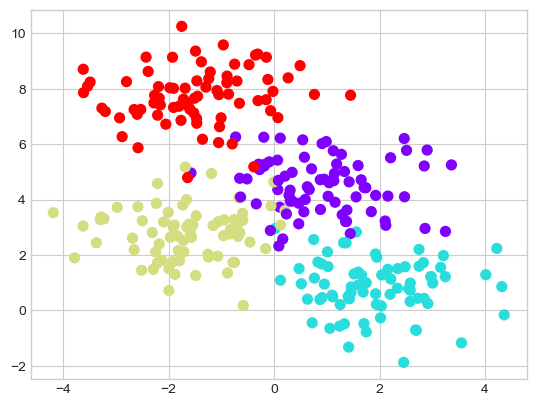

In [2]:
# Create a 2D data w/ 4 class labels:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
                clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
    levels=np.arange(n_classes + 1) - 0.5,
    cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

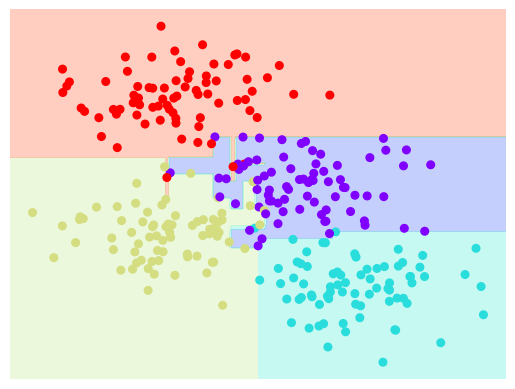

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [6]:
import dt_interactive_viz
dt_interactive_viz.plot_tree_interactive(X, y);

interactive(children=(IntSlider(value=5, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

### A.2. Decision Trees and Overfitting

* It is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the
overall properties of the distributions it is drawn from.

* Another way to see this overfitting is to look at models trained on different subsets of the data :
    * Some places the two trees produce consistent results , while in other places the trees give very different classifications.
    * The inconsistencies tend to happen where the classification is less certain.


# B. Ensembles of Estimators: Random Forests

* This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging.

* Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which overfits the data, and averages the results to find a better classification.

* An ensemble of randomized decision trees is known as a random forest.

* In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen:
    * This way all the data contributes to the fit each time, but the results of the fit still have the desired randomness.
    * When determining w/c feature to split on, the randomized tree might select from among the top several features.

* In scikit-learn, such an optimized ensemble of randomized decision trees is implented in the `RandomForestClassifier` estimator, w/c takes care of all the randomization automatically.

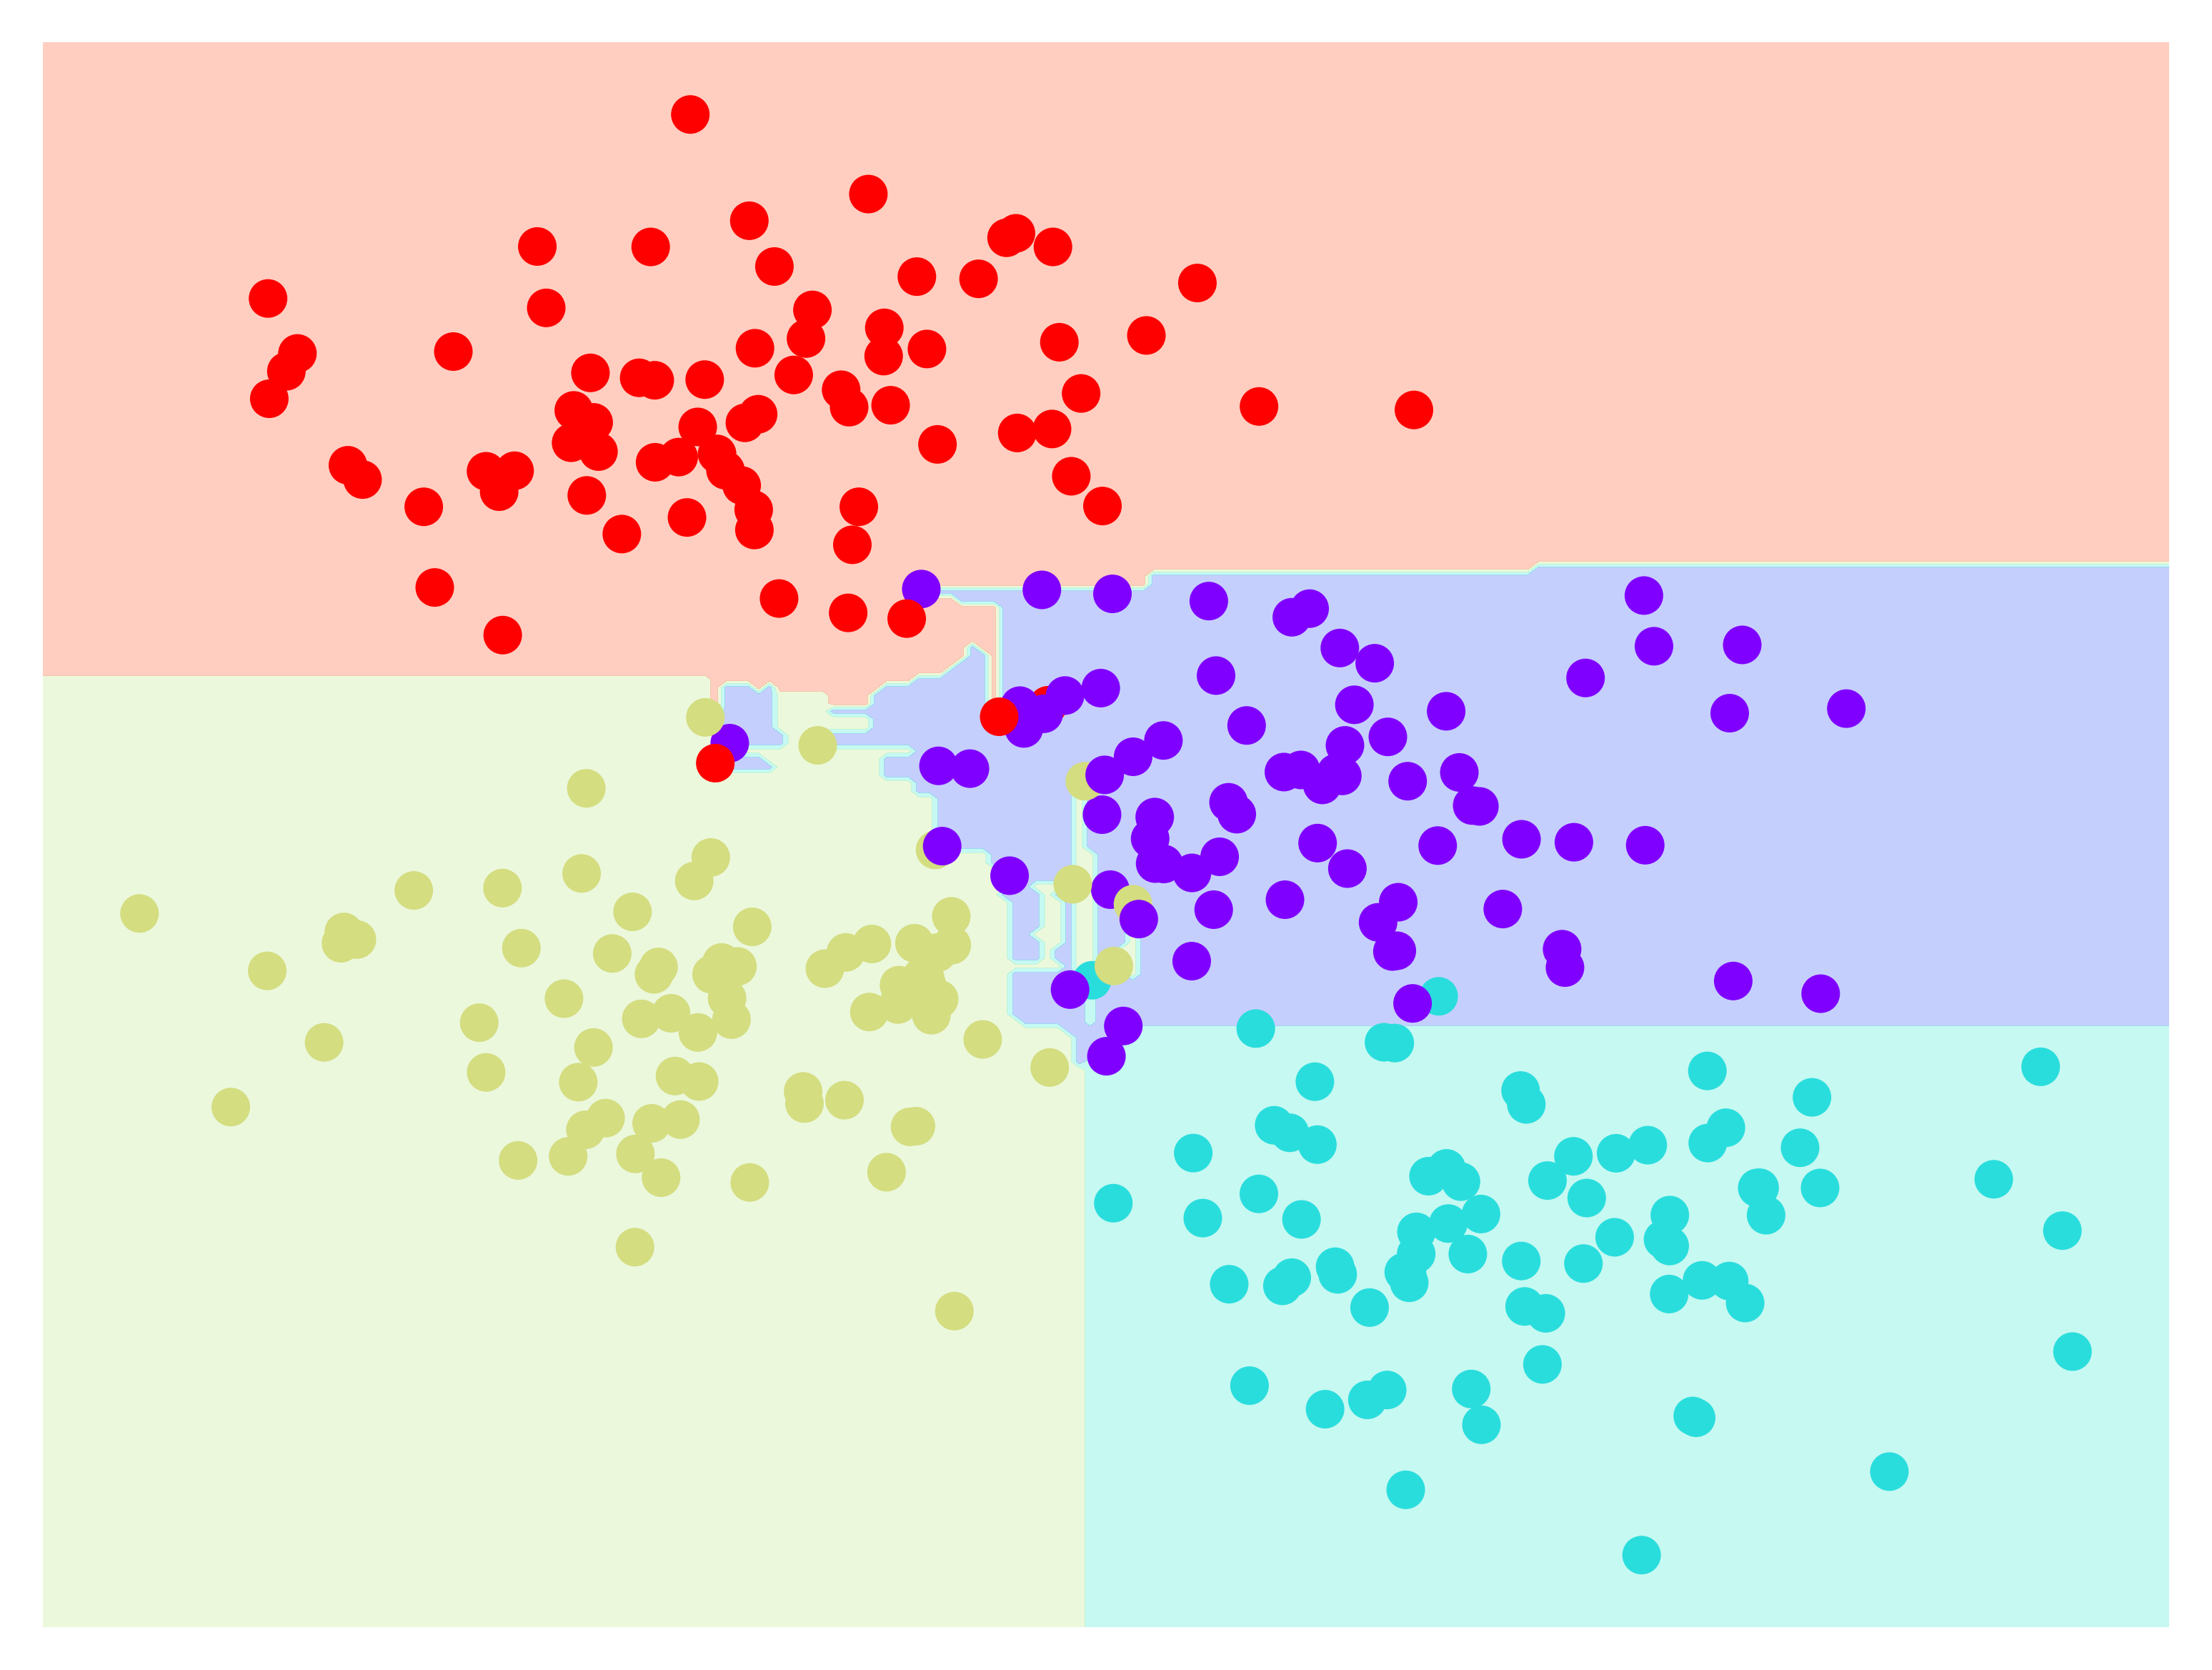

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()

bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

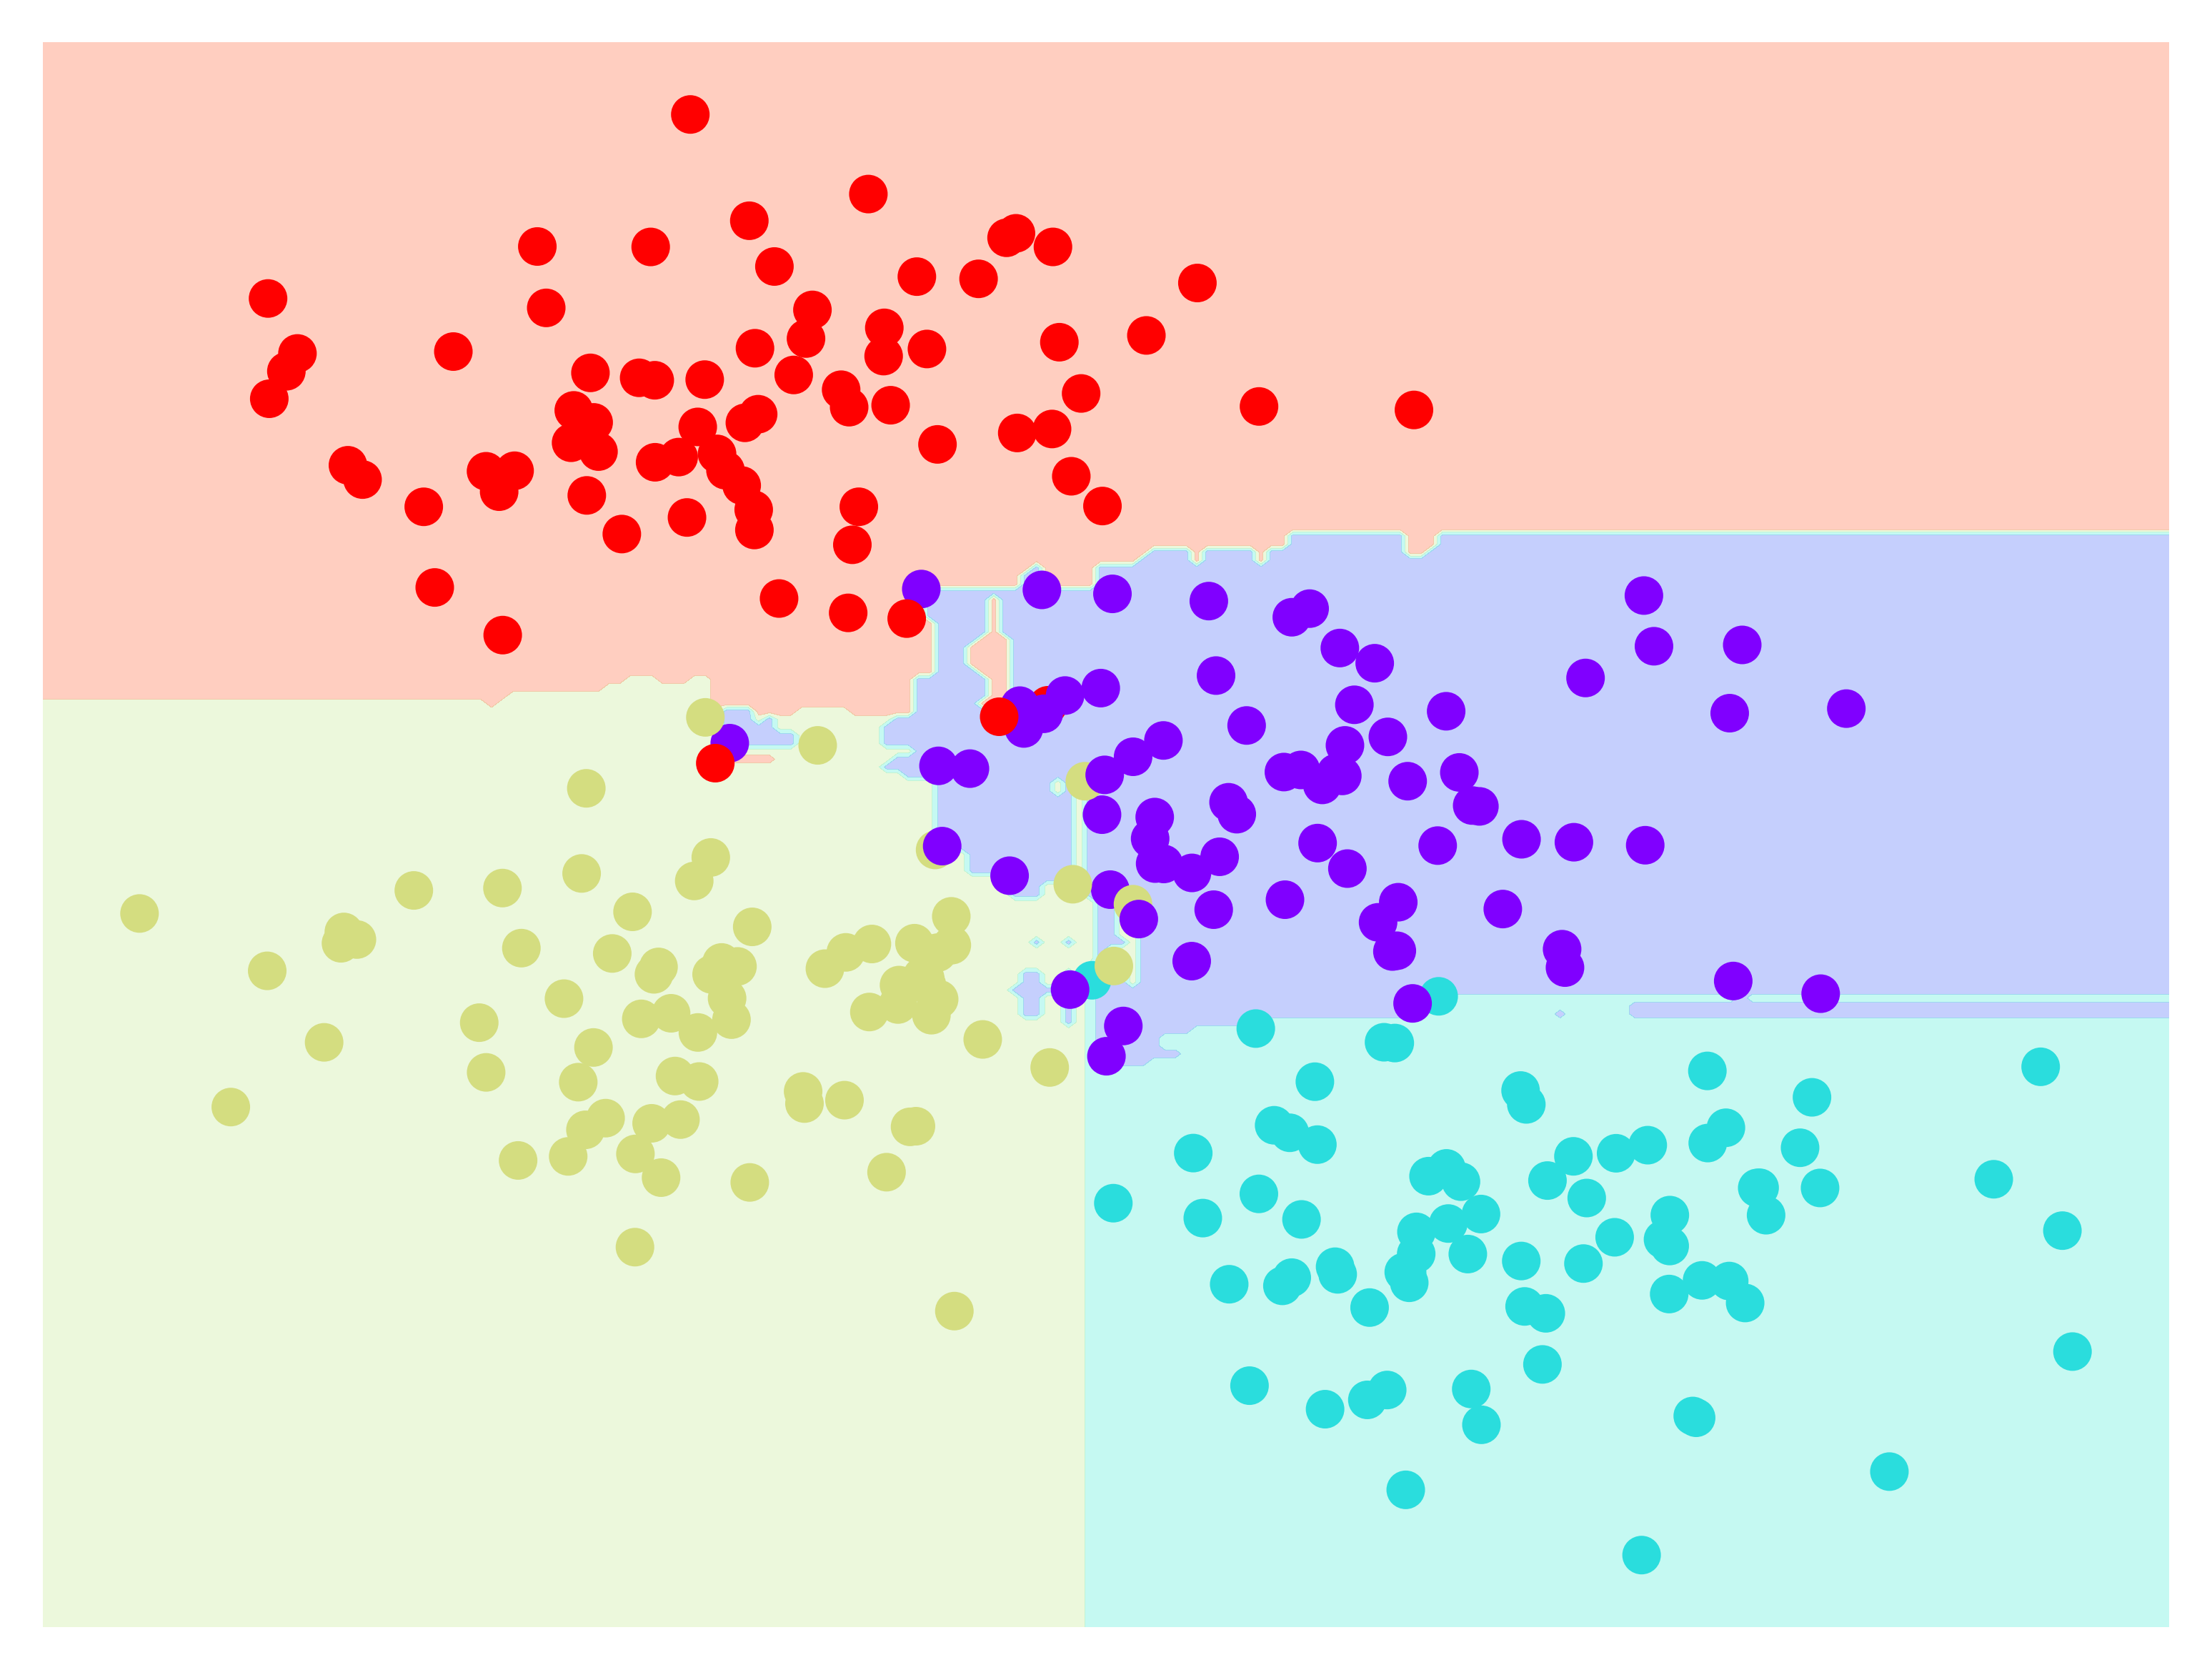

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

# C. Random Forest Regression



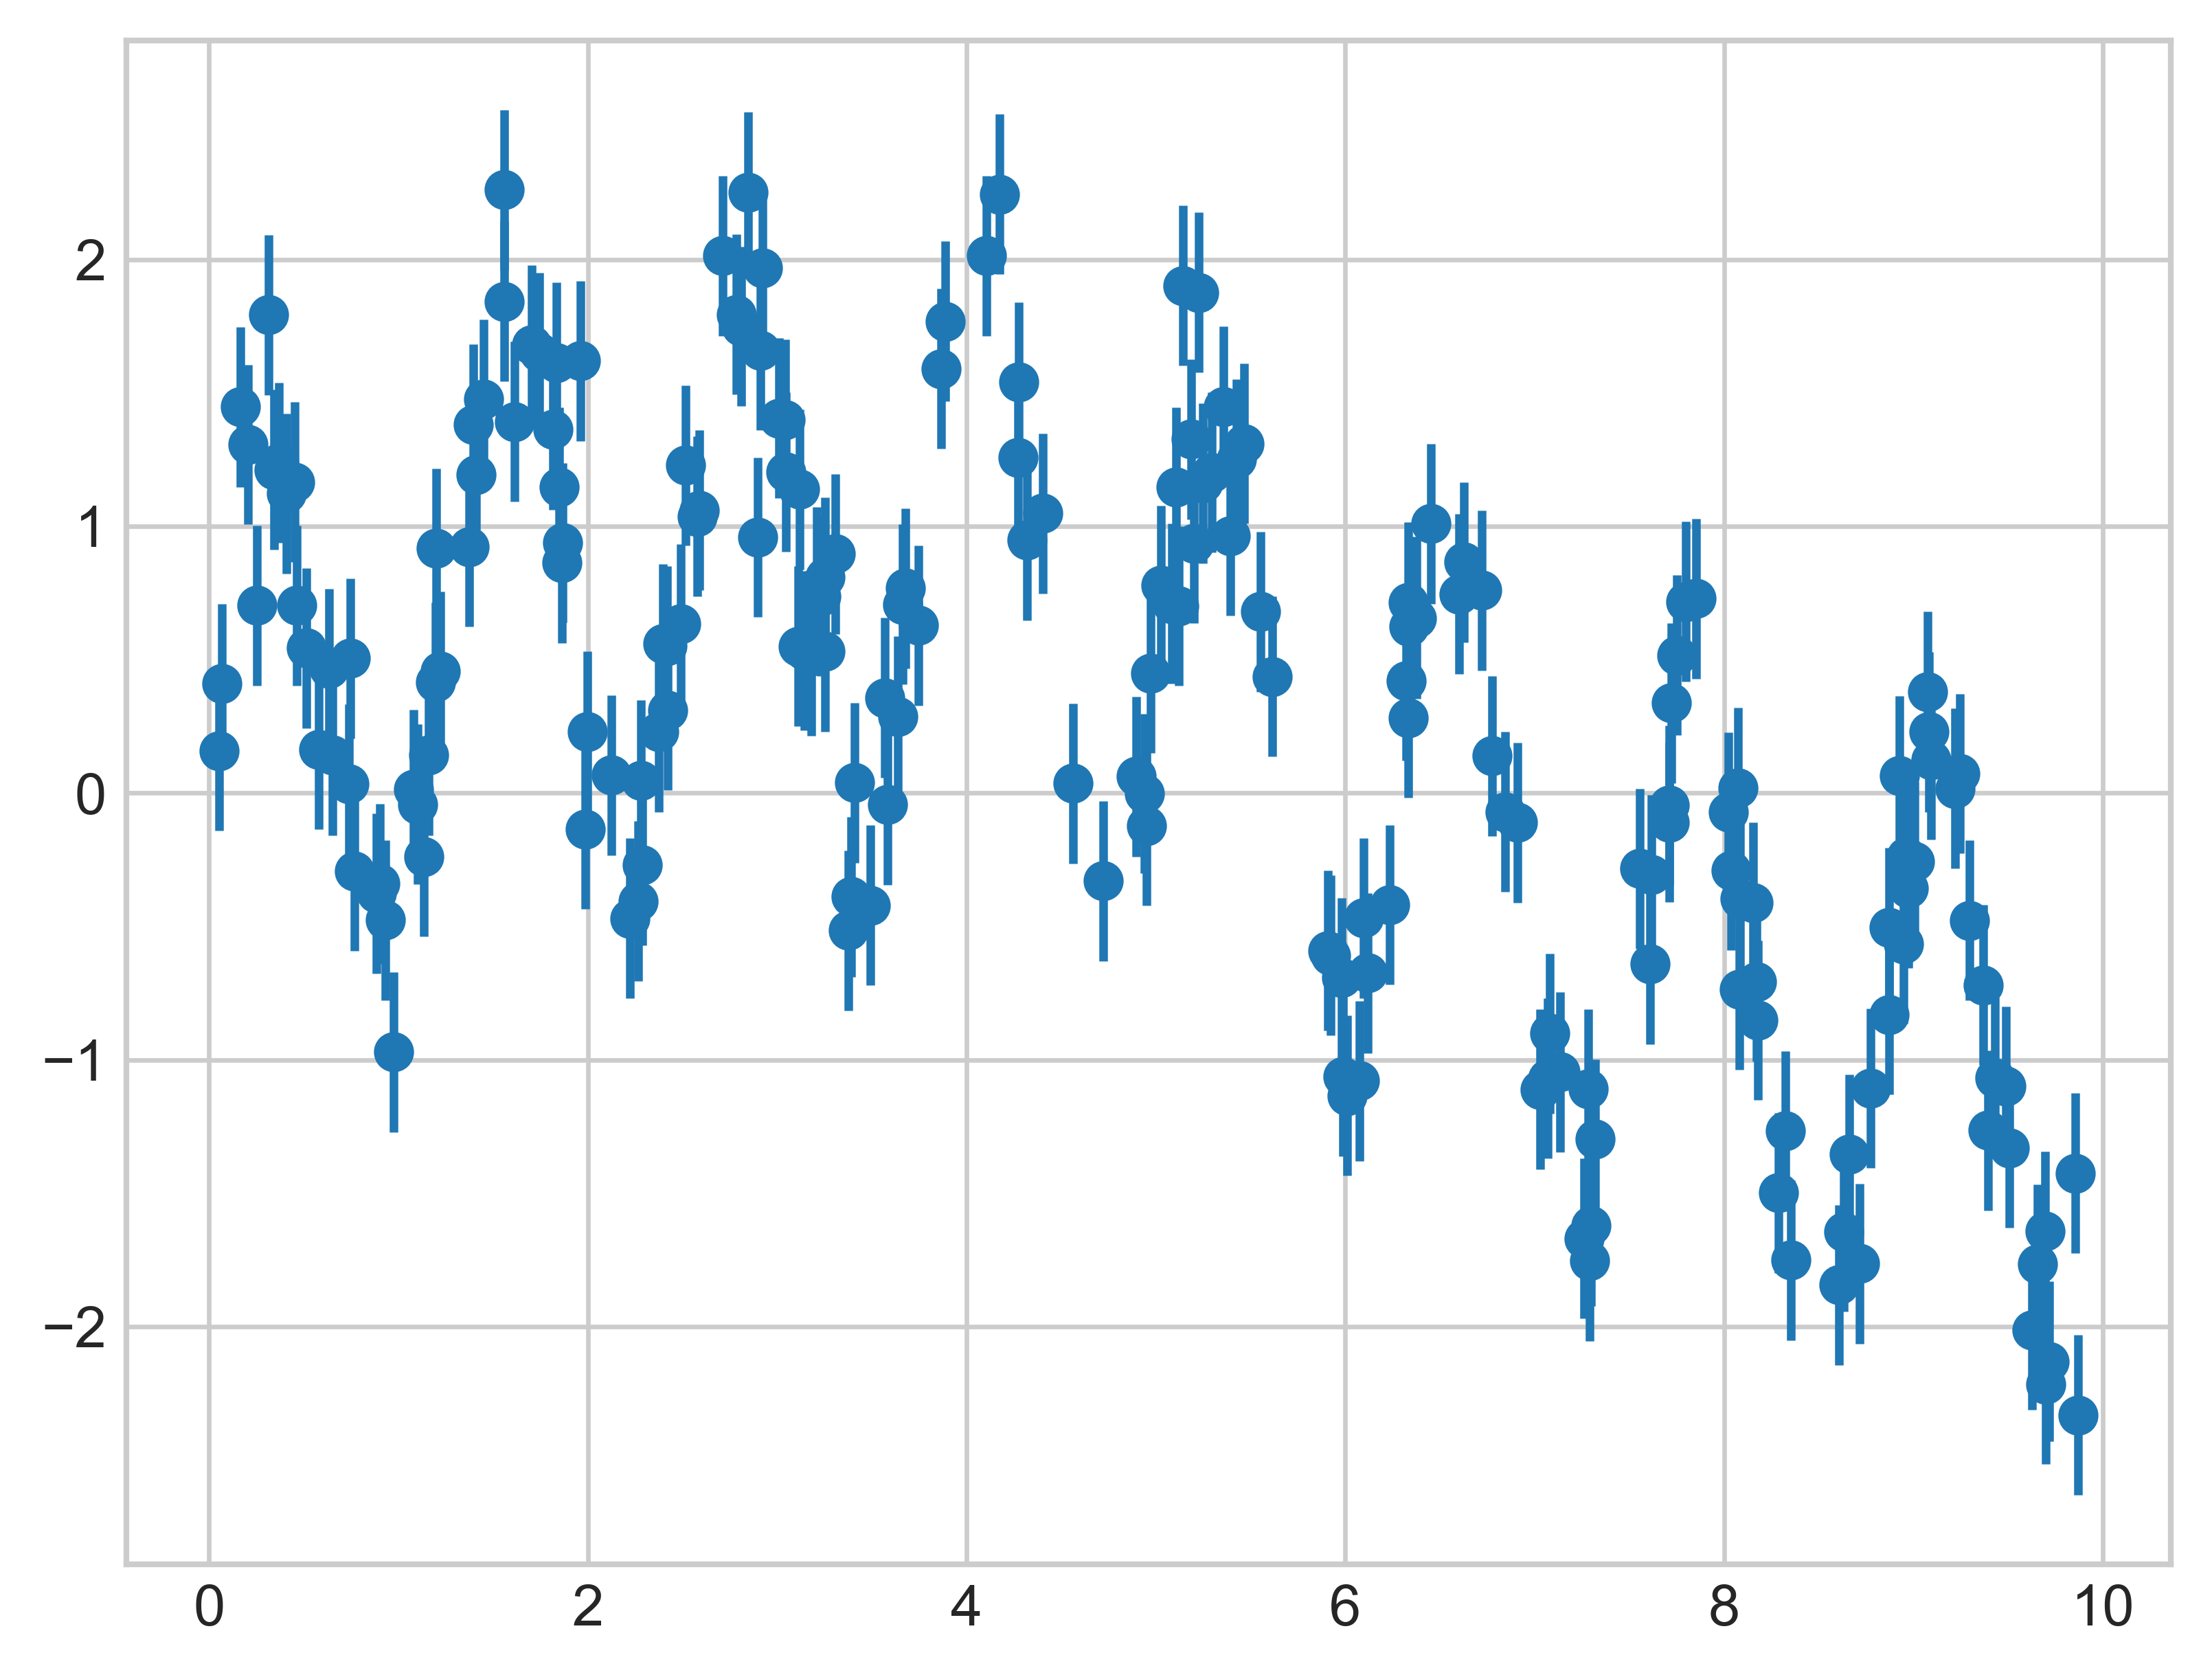

In [9]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

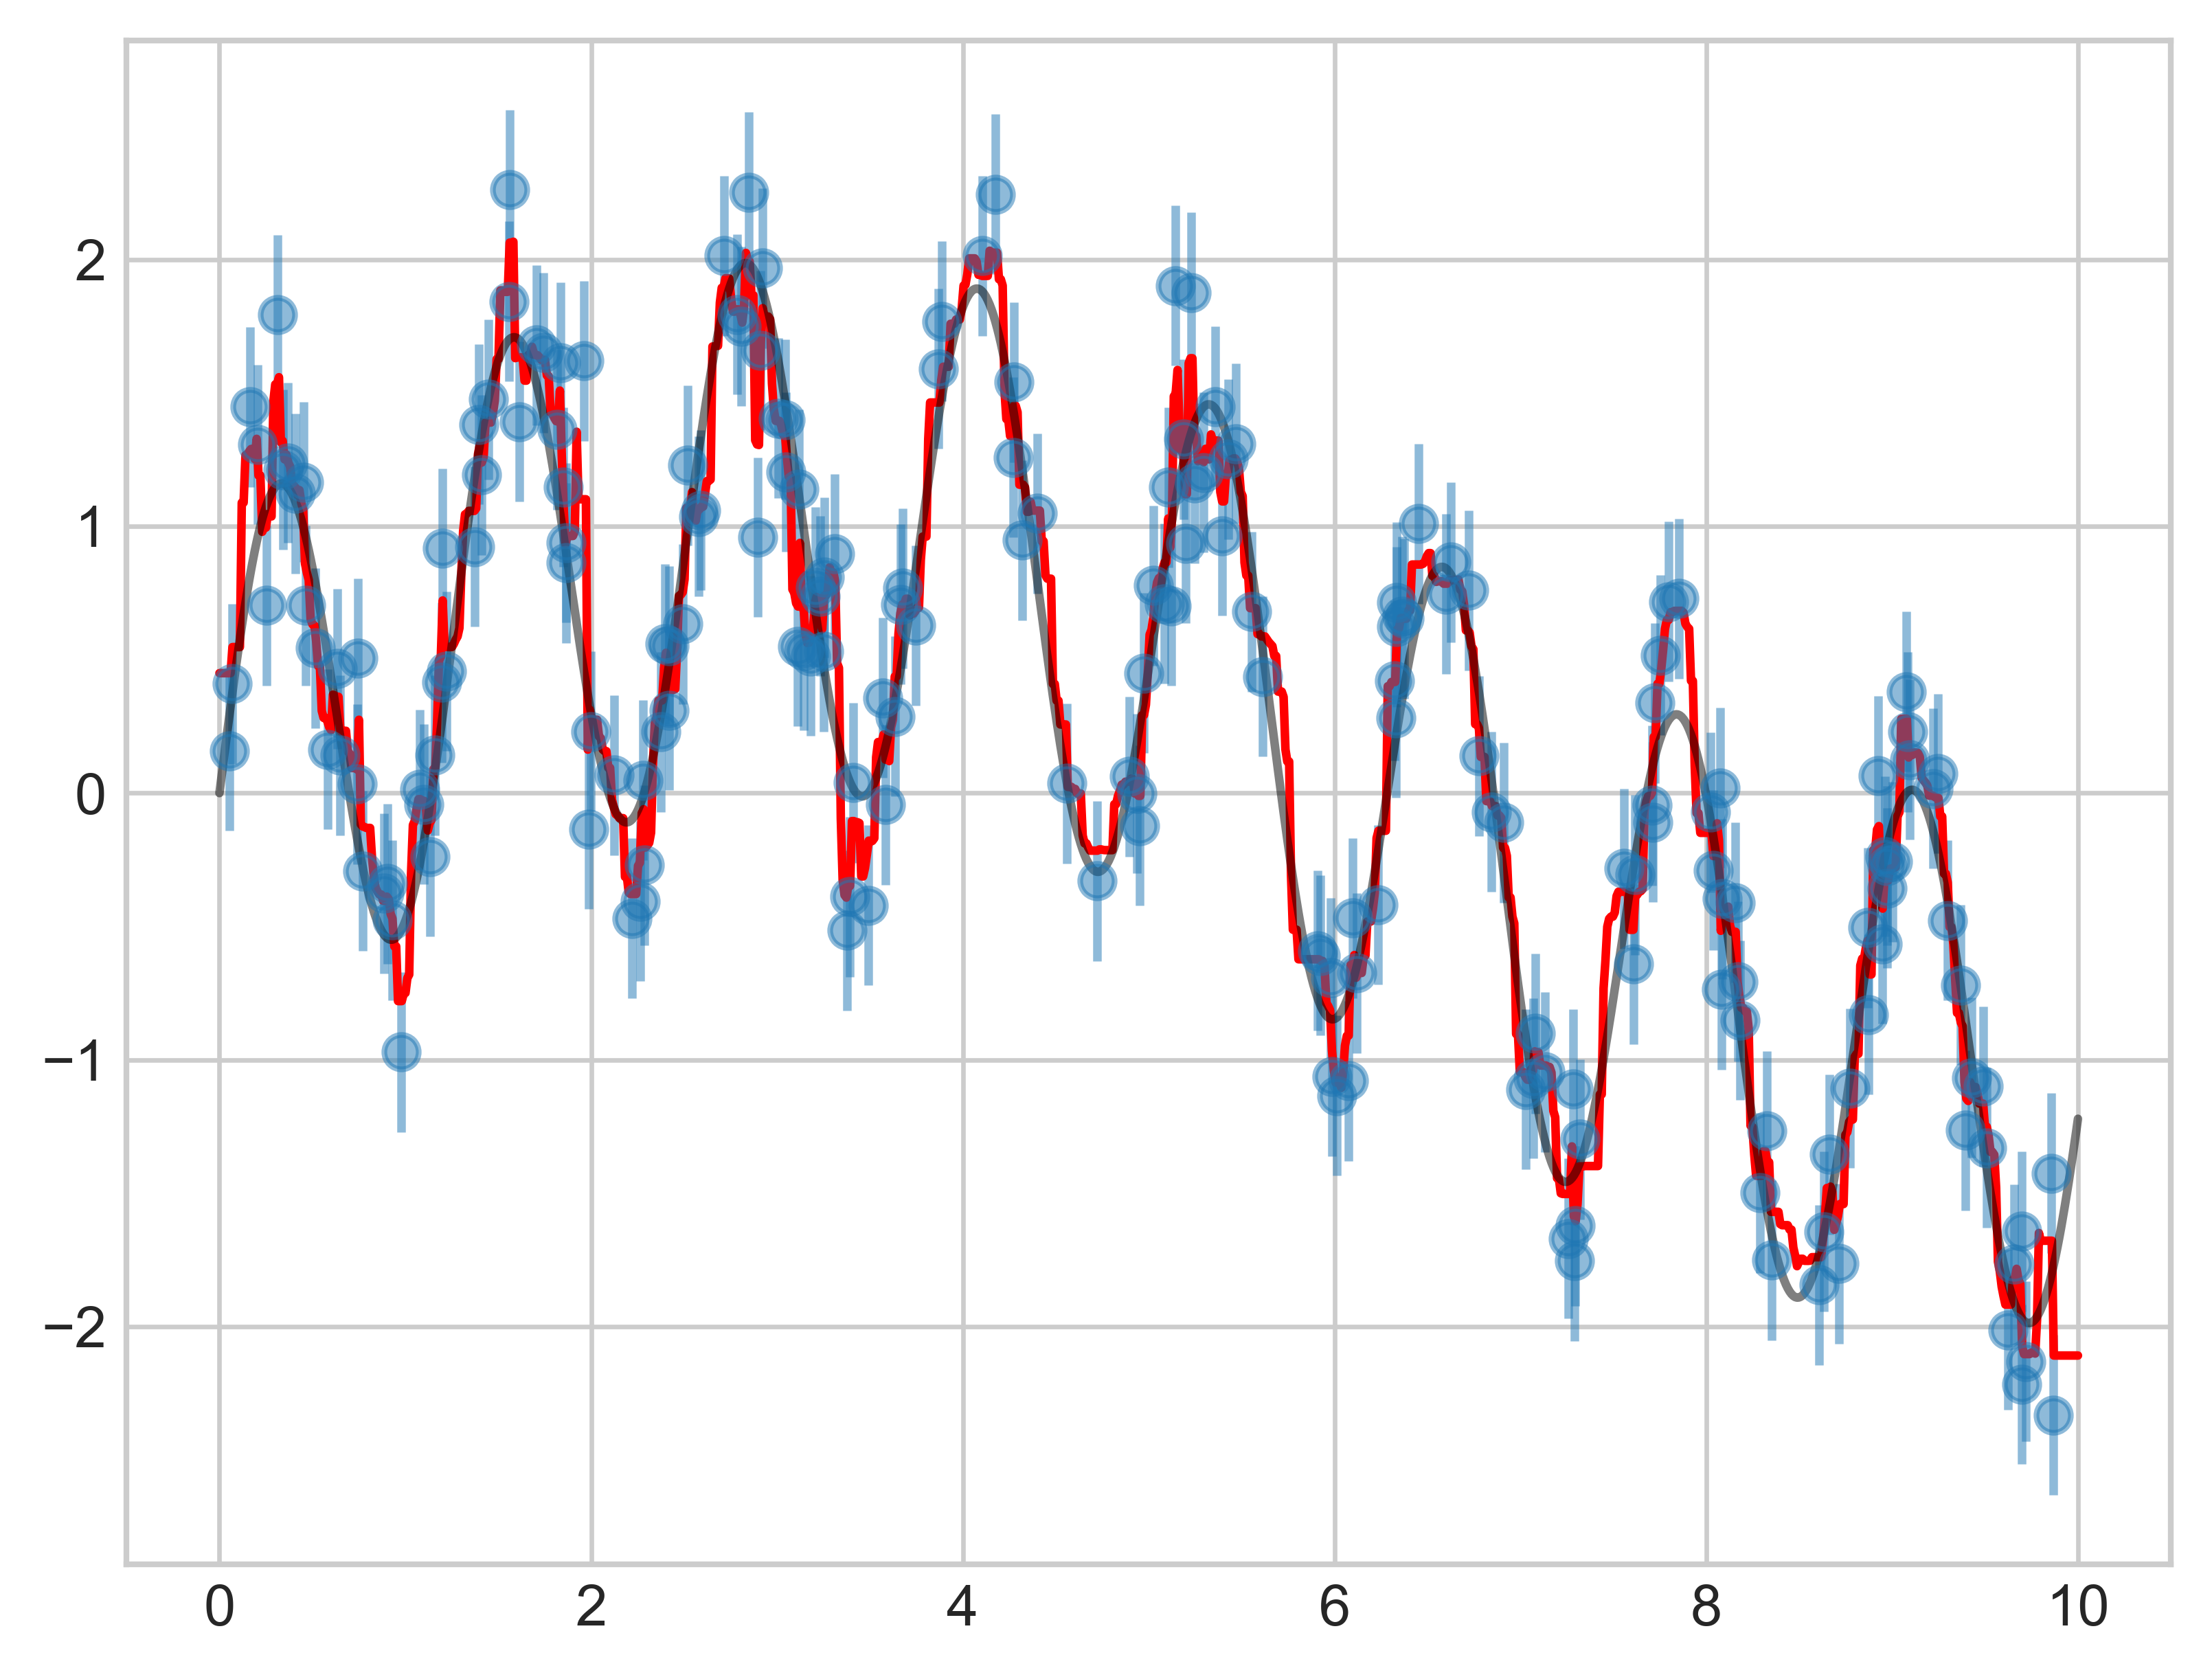

In [11]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

x_test = np.linspace(0, 10, 1000)
y_pred = forest.predict(x_test[:, None])

ytrue = model(x_test, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(x_test, y_pred, '-r');
plt.plot(x_test, ytrue, '-k', alpha=0.5);

# D. Example: Random Forest for Classifying Digits:

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

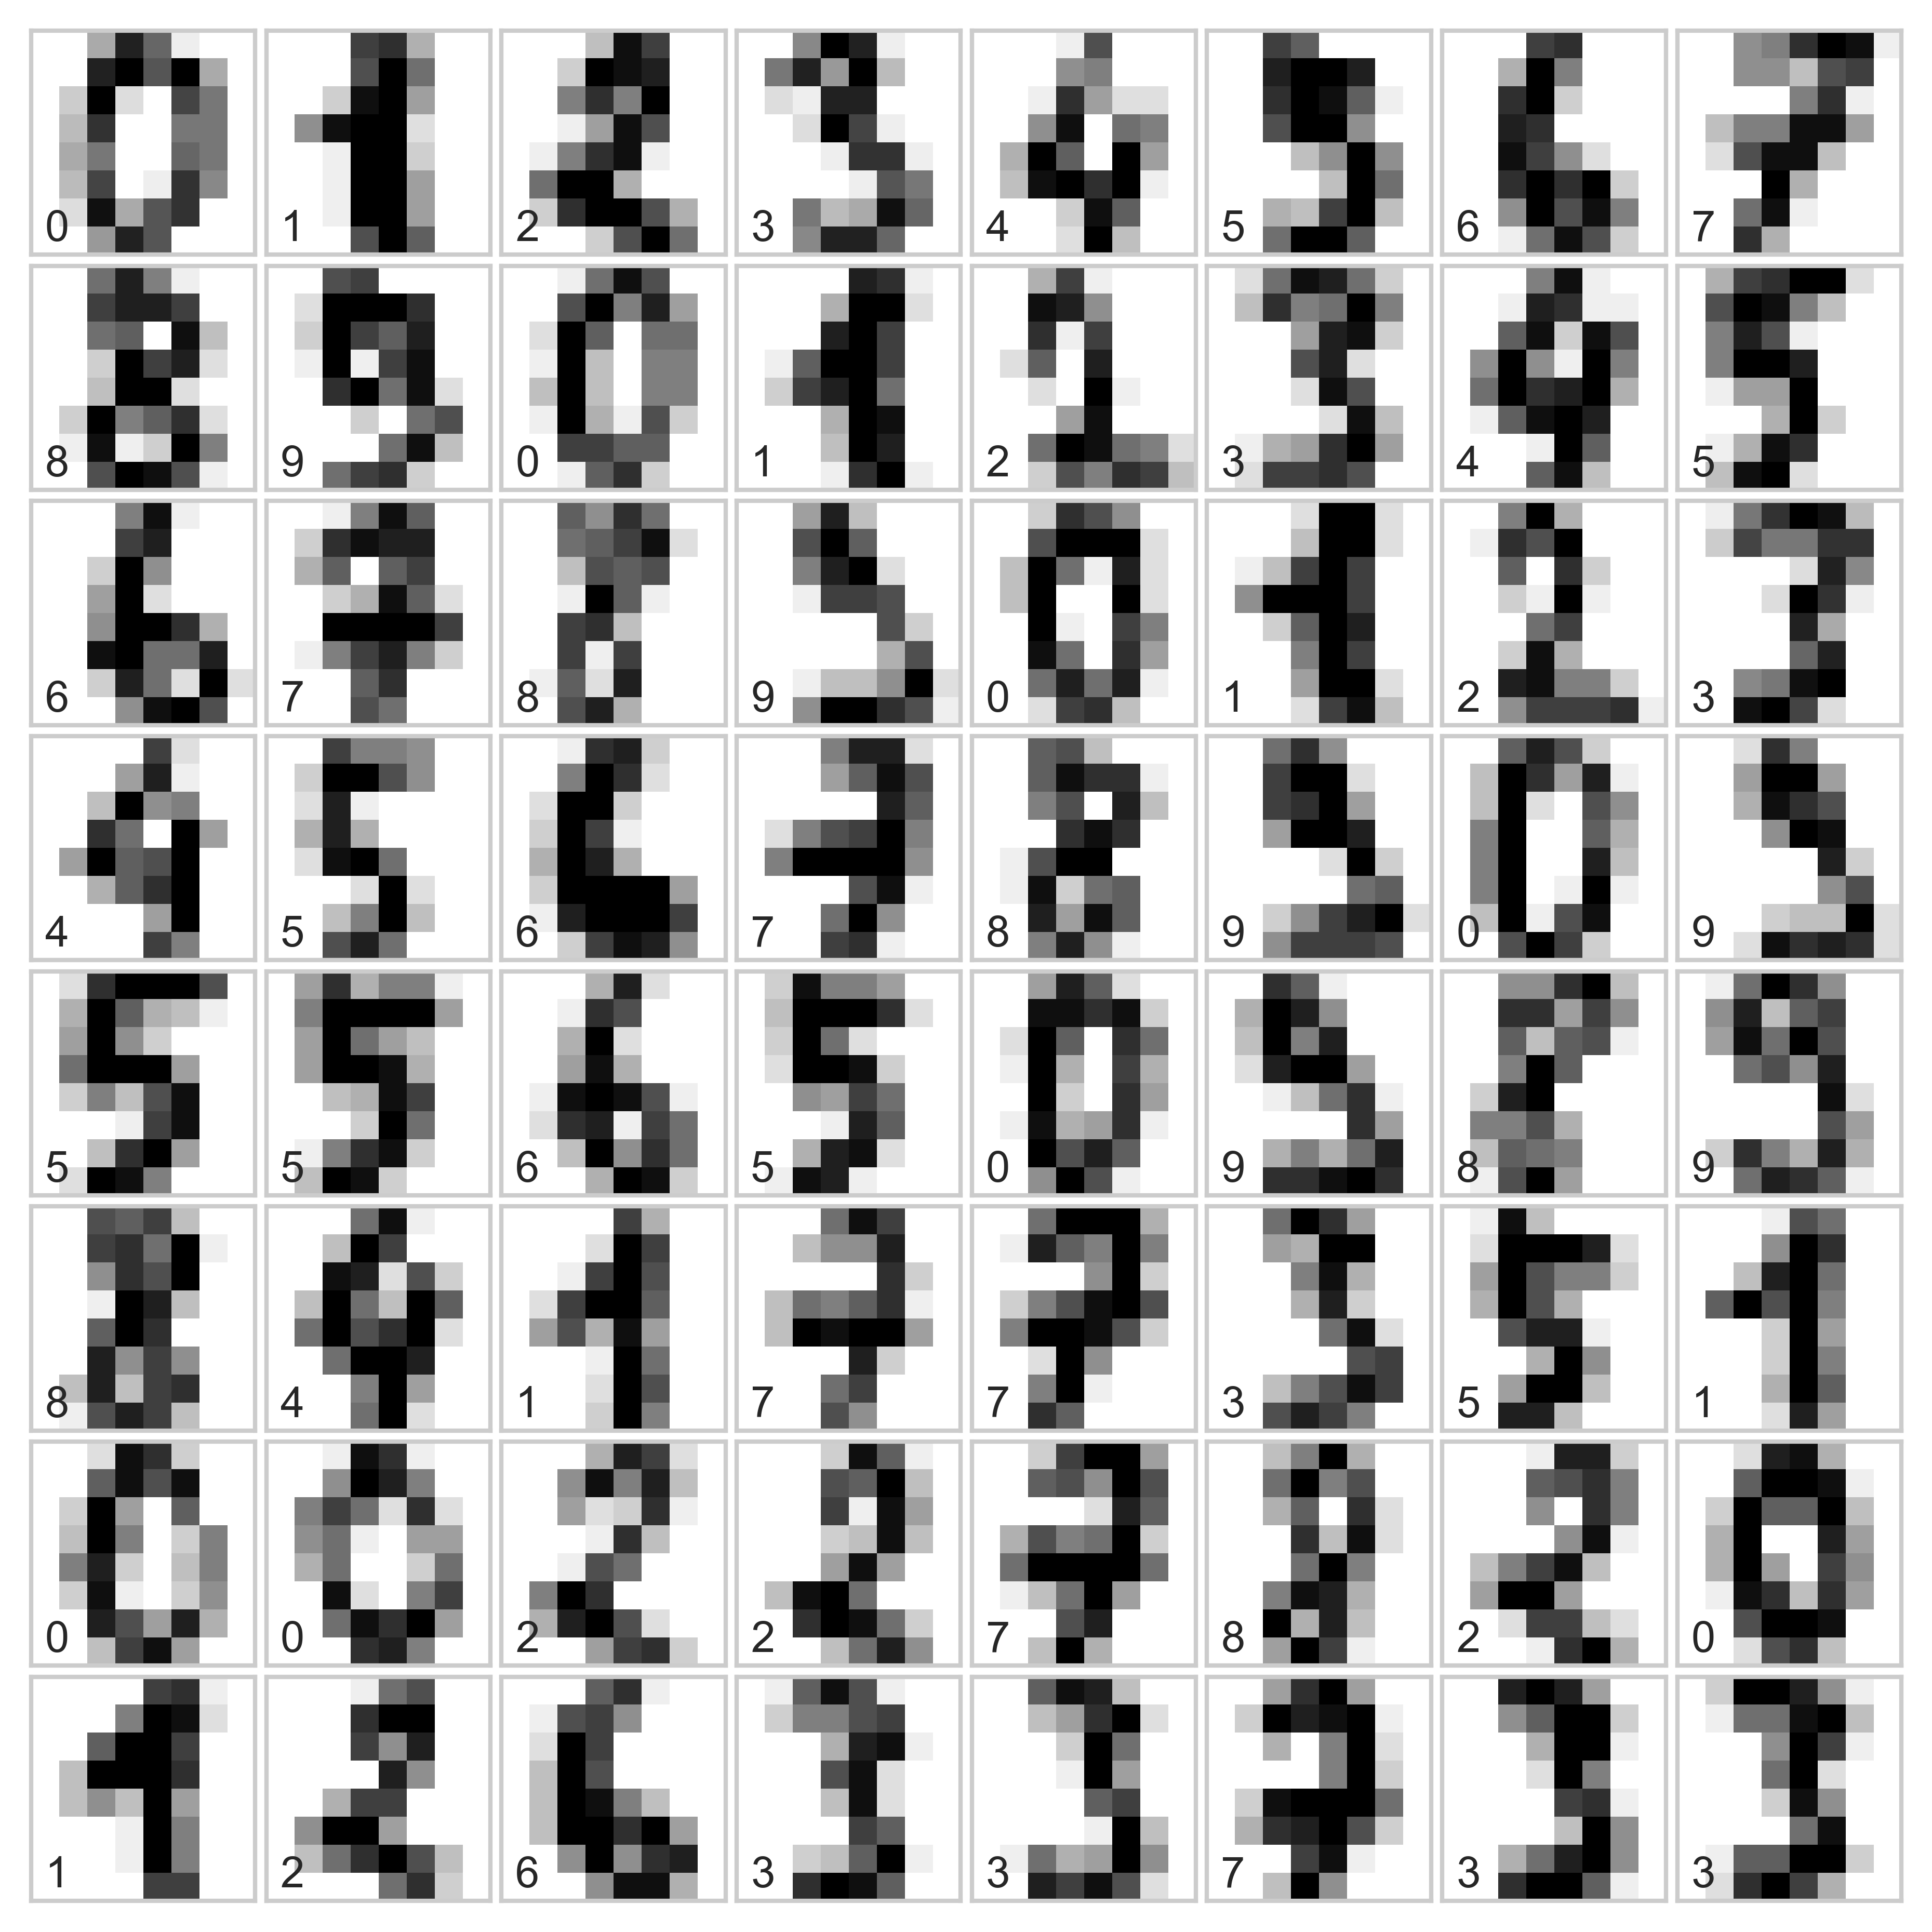

In [14]:
# set up the figure
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [15]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [16]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.98      1.00      0.99        43
           3       0.98      1.00      0.99        44
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



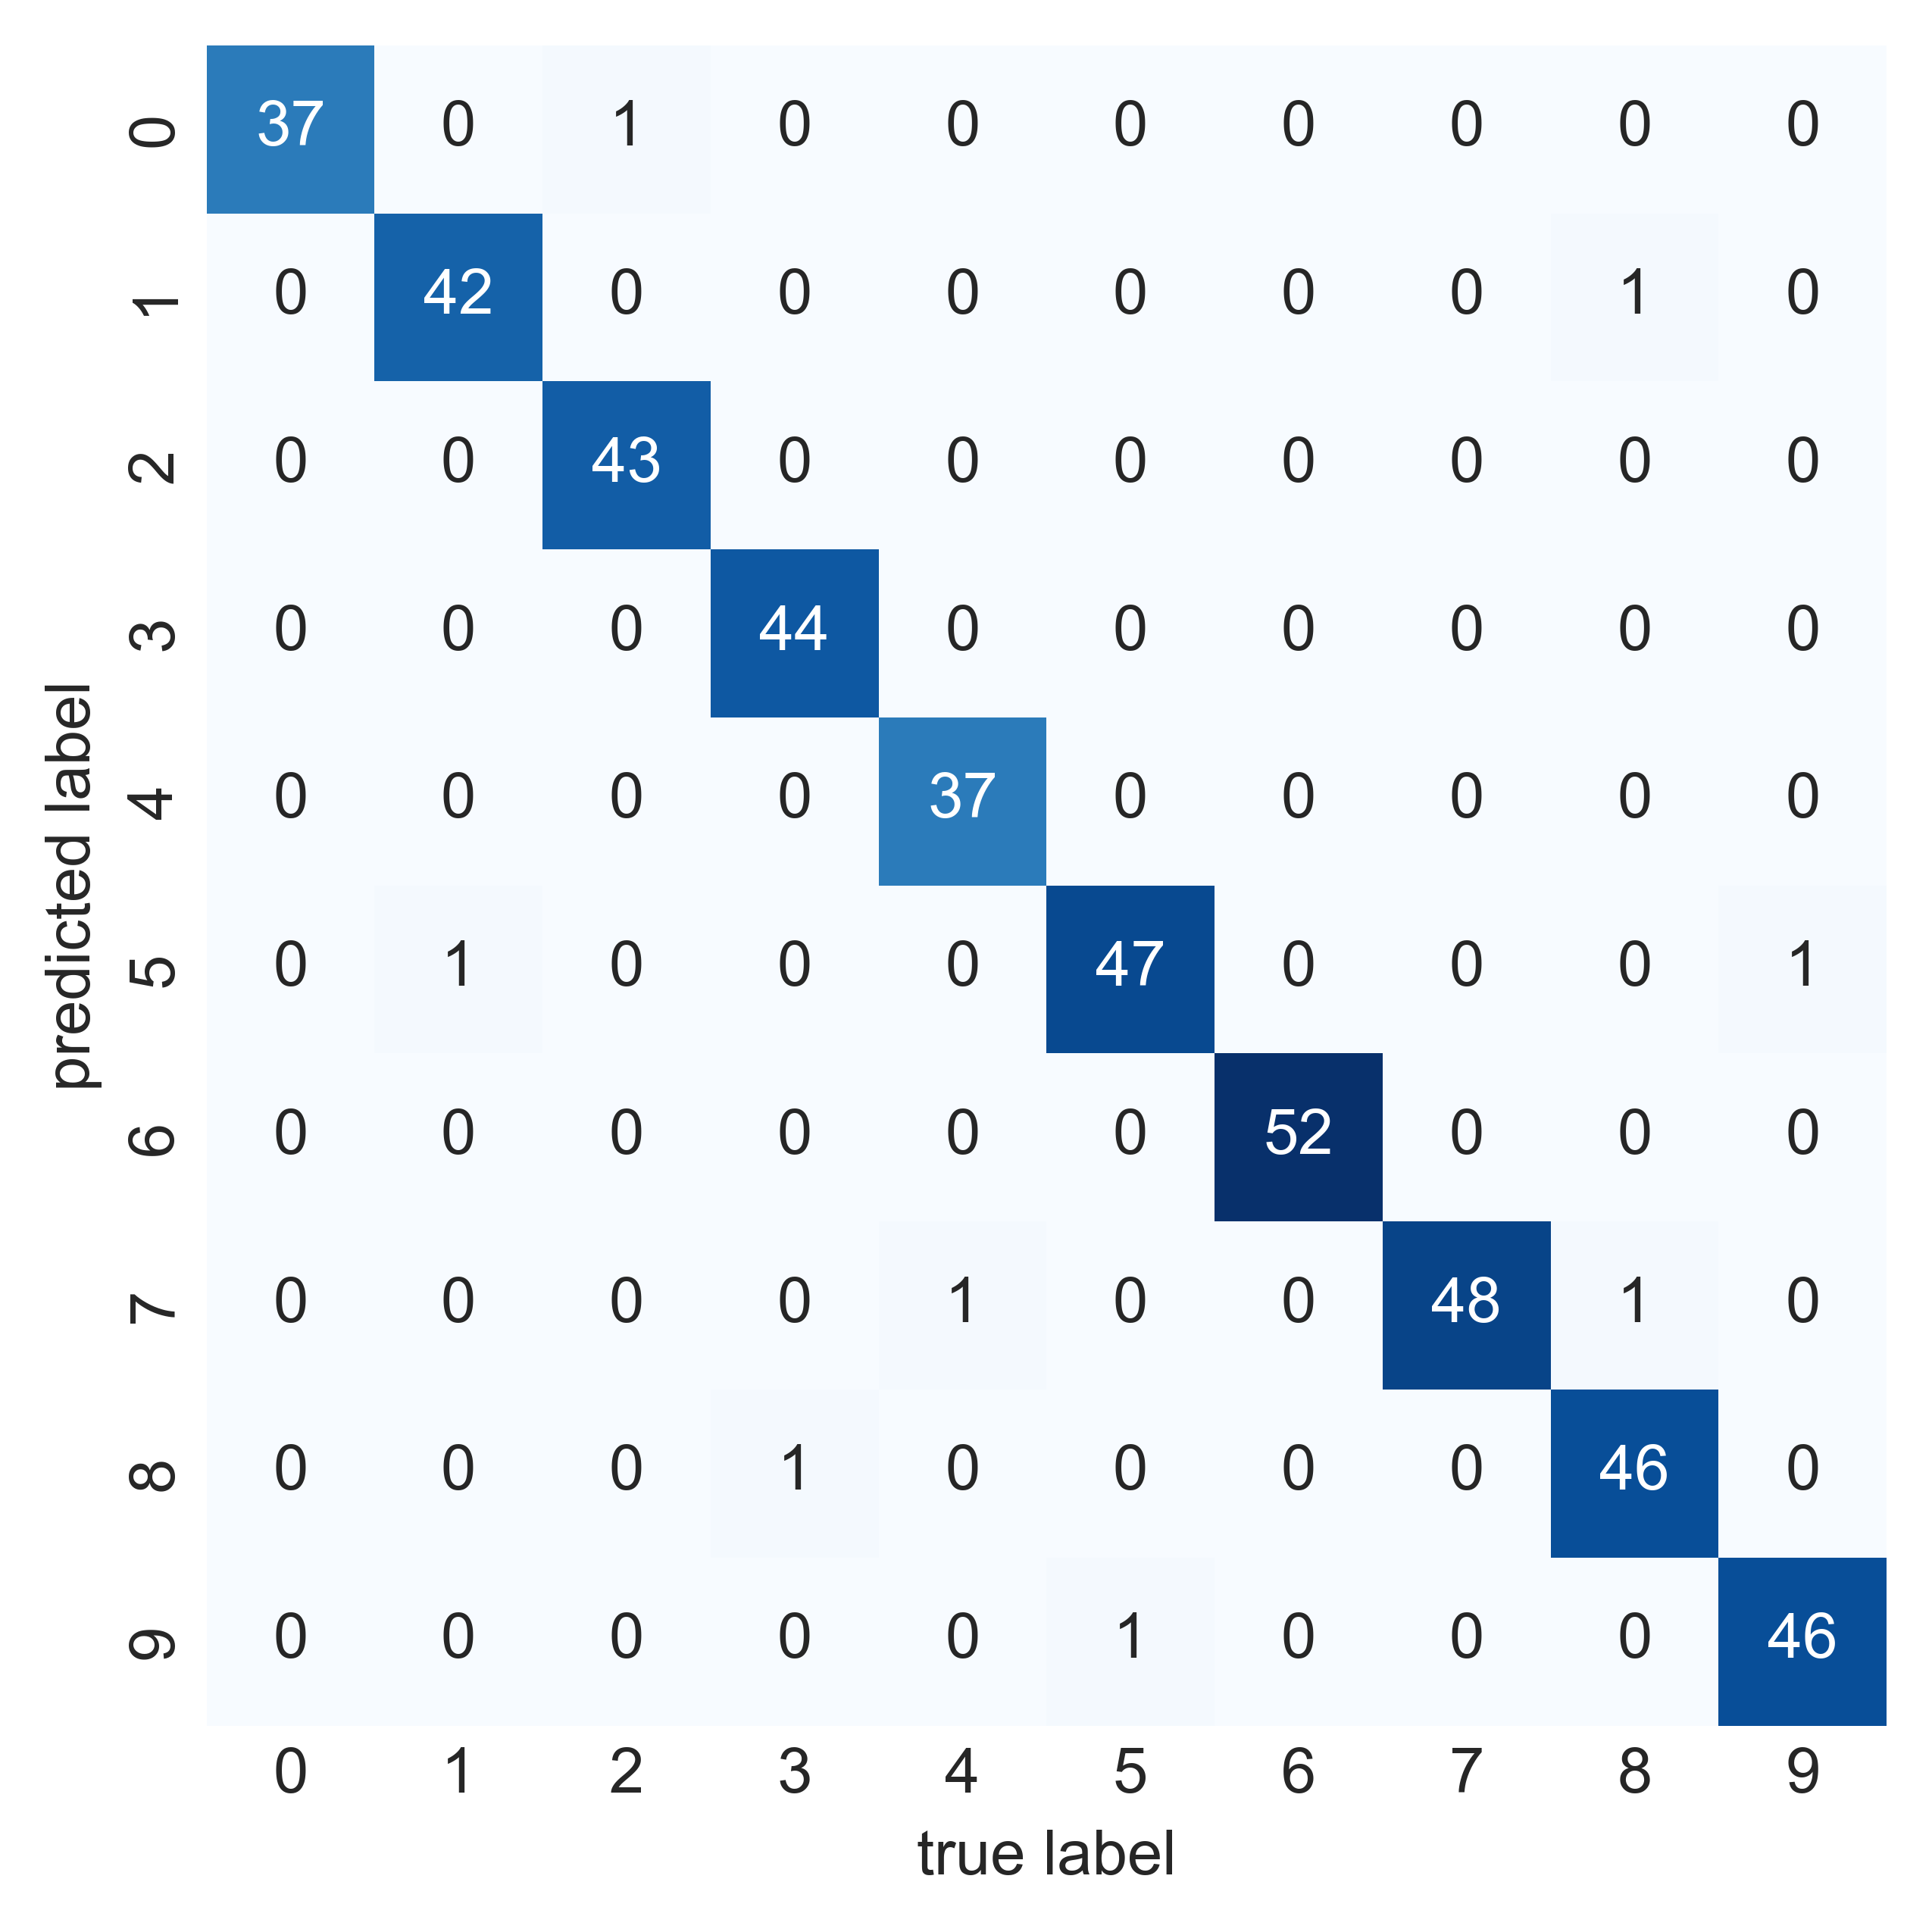

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, ypred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');